<a href="https://colab.research.google.com/github/AkshayJS/Computer-Vision-Projects/blob/main/CNN_for_mnist_(less_than_10%2C000_params).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


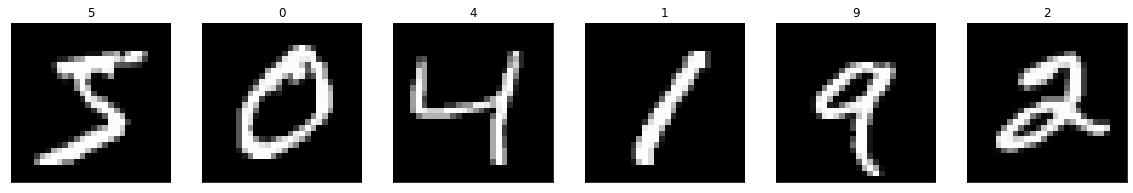

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [2]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [3]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(10,kernel_size=(4,4),padding='valid',activation='softmax'))

model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          3

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 118s - loss: 0.1828 - accuracy: 0.9418 - val_loss: 0.0699 - val_accuracy: 0.9758

Epoch 00001: val_loss improved from inf to 0.06986, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 - 115s - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0502 - val_accuracy: 0.9849

Epoch 00002: val_loss improved from 0.06986 to 0.05017, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 - 115s - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0280 - val_accuracy: 0.9907

Epoch 00003: val_loss improved from 0.05017 to 0.02799, saving model to model.weights.best.hdf5
Epoch 4/10
938/938 - 116s - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0282 - val_accuracy: 0.9922

Epoch 00004: val_loss did not improve from 0.02799
Epoch 5/10
938/938 - 115s - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0261 - val_accuracy: 0.9929

Epoch 00005: val_loss improved from 0.02799 to 0.02608, saving model to model.weights.best.hdf5
Epoch 6/10
938/938 - 115s - loss: 0.0204 - accuracy: 0

In [ ]:
model.load_weights("model.weights.best.hdf5")
_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 99.3600%
